In [2]:
import numpy as np

x = np.array([1, 2, 3])
print(x.__class__)

<class 'numpy.ndarray'>


In [3]:
x.shape

(3,)

In [4]:
x.ndim

1

In [17]:
x = x.reshape(1,-1)
x.shape

(1, 3)

In [18]:
x.ndim

2

In [19]:
W = np.array([[1, 2, 3], [4, 5, 6]])
W.shape

(2, 3)

In [20]:
W.ndim

2

In [24]:
## 행렬의 원소별 연산

In [25]:
X = np.array([[0, 1, 2], [3, 4, 5]])
W = np.array([[1, 2, 3], [4, 5, 6]])

In [26]:
W + X

array([[ 1,  3,  5],
       [ 7,  9, 11]])

In [27]:
W * X

array([[ 0,  2,  6],
       [12, 20, 30]])

In [28]:
## 브로드캐스트 ( 형상이 다른 배열끼리 연산)

In [30]:
## 스칼라 값 10이 2 x 2 행렬로 확장된 후 원소별 연산 
A = np.array([[1, 2], [3, 4]])
A * 10

array([[10, 20],
       [30, 40]])

In [31]:
## 1차원 배열 b가 2차원 배열 A와 형상이 같아지도록 확장
A = np.array([[1, 2], [3, 4]])
b = np.array([10, 20])
A * b

array([[10, 40],
       [30, 80]])

In [35]:
## 벡터 내적과 행렬 곱
## 벡터 내적에는 np.dot()을, 행렬 곱에는 np.matmul()으로 구분하여 사용하는 편이 좋다.

In [36]:
# 벡터 내적
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
np.dot(a, b)

32

In [37]:
# 행렬 곱
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
np.matmul(A, B)

array([[19, 22],
       [43, 50]])

In [38]:
import numpy as np
W1 = np.random.randn(2, 4)
b1 = np.random.randn(4)
x = np.random.randn(10, 2)
h = np.matmul(x, W1) + b1

In [39]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [40]:
a = sigmoid(h)

In [43]:
a

array([[0.87328754, 0.11686536, 0.9826303 , 0.24433646],
       [0.79486935, 0.28187652, 0.86790569, 0.31375872],
       [0.37285308, 0.65737132, 0.79915754, 0.11503799],
       [0.83686398, 0.09311924, 0.99644089, 0.12538877],
       [0.87497231, 0.25277949, 0.70448071, 0.51090966],
       [0.33196794, 0.72861686, 0.67241807, 0.12614076],
       [0.78529429, 0.20753743, 0.96702314, 0.20175257],
       [0.3568118 , 0.82257349, 0.20066086, 0.25340198],
       [0.84966087, 0.15730435, 0.9675686 , 0.25979021],
       [0.44914256, 0.57422409, 0.85185068, 0.12649136]])

In [46]:
## 순전파 구현
## 밑바닥 1와 다르게 활성화 함수 구현할 때 생성자 인스턴스 변수에 파라미터 리스트를 추가한다.
import numpy as np

class Sigmoid:
    def __init__(self):
        self.params = []
        
    def forward(self, x):
        return 1 / (1 + np.exp(-x))

In [47]:
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        
    def forward(self, x):
        W, b = self.params
        out = np.matmul(x, W) + b
        return out

In [49]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        # 가중치와 편향 초기화
        W1 = np.random.randn(I, H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H, O)
        b2 = np.random.randn(O)
        
        # 계층 생성
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
    
        # 모든 가중치를 리스트에 모은다
        self.params = []
        for layer in self.layers:
            self.params += layer.params
            
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

In [50]:
x = np.random.randn(10, 2)
model = TwoLayerNet(2, 4, 3)
s = model.predict(x)

In [52]:
s.shape

(10, 3)

In [53]:
# Repeat 노드

import numpy as np

D, N = 8, 7
x = np.random.randn(1, D)
y = np.repeat(x, N, axis = 0)
dy = np.random.randn(N, D)
dx = np.sum(dy, axis = 0, keepdims = True)

In [56]:
print(x)

[[-0.39057529  0.51532945 -0.66633237  1.31315897 -0.10683937  1.52597722
  -0.73383412  1.51474359]]


In [57]:
print(y)

[[-0.39057529  0.51532945 -0.66633237  1.31315897 -0.10683937  1.52597722
  -0.73383412  1.51474359]
 [-0.39057529  0.51532945 -0.66633237  1.31315897 -0.10683937  1.52597722
  -0.73383412  1.51474359]
 [-0.39057529  0.51532945 -0.66633237  1.31315897 -0.10683937  1.52597722
  -0.73383412  1.51474359]
 [-0.39057529  0.51532945 -0.66633237  1.31315897 -0.10683937  1.52597722
  -0.73383412  1.51474359]
 [-0.39057529  0.51532945 -0.66633237  1.31315897 -0.10683937  1.52597722
  -0.73383412  1.51474359]
 [-0.39057529  0.51532945 -0.66633237  1.31315897 -0.10683937  1.52597722
  -0.73383412  1.51474359]
 [-0.39057529  0.51532945 -0.66633237  1.31315897 -0.10683937  1.52597722
  -0.73383412  1.51474359]]


In [58]:
print(dy)

[[-1.48802386 -0.36247714  0.67944377  0.46148554  0.39210312  0.96041136
  -0.2319583   1.03504079]
 [ 0.49408099 -0.44191606  0.66216099 -0.63919528  0.52278544 -0.02201221
  -0.62155243 -1.70142517]
 [-0.21844582 -0.55775246 -0.27753567  0.17359992  0.35613869 -0.41732783
  -0.45293185 -0.0384613 ]
 [-1.82927866  1.22801374  0.5563393  -1.55174628  0.52721912  0.02822953
   0.66636463 -0.183143  ]
 [-0.20889549 -0.42179014 -0.70778023  0.81407298  0.01017384 -0.95741959
  -0.80708055 -0.84899719]
 [-0.58789656 -1.31931831 -0.34055907 -0.83478446  0.23923975  1.2198923
  -1.52610802 -1.06919416]
 [ 0.33757348 -0.54574498 -0.26303337  0.92261947 -0.12491158  1.08765579
  -1.50050387 -1.11392973]]


In [59]:
print(dx)

[[-3.50088592 -2.42098536  0.30903572 -0.65394813  1.92274839  1.89942933
  -4.47377038 -3.92010976]]


In [60]:
## Sum 노드

import numpy as np
D, N = 8, 7
x = np.random.randn(N, D)
y = np.sum(x, axis = 0, keepdims = True)
dy = np.random.randn(1, D)
dx = np.repeat(dy, N, axis = 0)

In [61]:
print(x)

[[ 1.26544784 -0.69062701 -0.02928905 -1.97934254  0.2090217   0.11450821
  -0.65209705  1.67730007]
 [ 0.53668938  2.25919912 -0.49890359  1.10880378 -0.71134848  1.40232631
   1.04556121  1.53862463]
 [ 0.01916842  1.11051244 -0.78700061 -0.76751875  0.65486671 -0.69350337
  -1.22538984  0.13835155]
 [ 1.98014256 -0.43934384 -0.45774402 -0.14716533  1.02219861  0.48575982
   1.40375697  0.42061162]
 [-1.28012276  0.58734384 -0.82416312  1.31000071  0.04509168 -0.02452623
  -0.13779119 -0.55547679]
 [ 0.19408446 -0.8603617   1.45748618  0.40499001 -1.13946673 -0.67194076
  -1.15608416  2.08820775]
 [-1.7931803  -1.43133493  0.04474614  1.6241199   0.24692001 -1.02996594
  -1.17237211  1.35004327]]


In [62]:
print(y)

[[ 0.9222296   0.53538791 -1.09486807  1.55388778  0.32728351 -0.41734195
  -1.89441618  6.6576621 ]]


In [63]:
print(dy)

[[-1.98179073  0.12848877  0.13169351 -0.26796905 -0.13315339 -0.40564309
  -0.52891818 -0.32545131]]


In [64]:
print(dx)

[[-1.98179073  0.12848877  0.13169351 -0.26796905 -0.13315339 -0.40564309
  -0.52891818 -0.32545131]
 [-1.98179073  0.12848877  0.13169351 -0.26796905 -0.13315339 -0.40564309
  -0.52891818 -0.32545131]
 [-1.98179073  0.12848877  0.13169351 -0.26796905 -0.13315339 -0.40564309
  -0.52891818 -0.32545131]
 [-1.98179073  0.12848877  0.13169351 -0.26796905 -0.13315339 -0.40564309
  -0.52891818 -0.32545131]
 [-1.98179073  0.12848877  0.13169351 -0.26796905 -0.13315339 -0.40564309
  -0.52891818 -0.32545131]
 [-1.98179073  0.12848877  0.13169351 -0.26796905 -0.13315339 -0.40564309
  -0.52891818 -0.32545131]
 [-1.98179073  0.12848877  0.13169351 -0.26796905 -0.13315339 -0.40564309
  -0.52891818 -0.32545131]]


In [12]:
## MatMul 노드의 역전파 

class MatMul:
        def __init__(self, W):
            self.params = [W]
            self.grads = [np.zeros_like(W)]
            self.x = None
            
        def forward(self, x):
            W, = self.params
            out = np.matmul(x, W)
            self.x = x
            return out
        
        def backward(self, dout):
            W, = self.params
            dx = np.matmul(dout, W.T)
            dW = np.matmul(self.x.T, dout)
            self.grads[0][...] = dW  ## [...] 생략 기호를 사용하여 깊은복사
            return dx

In [14]:
class Sigmoid:
    def __init__(self):
        self.params, self.grads = [], []
        self.out = None
        
    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out
    
    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        return dx

In [15]:
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None
        
    def forward(self, x):
        W, b = self.params
        out = np.matmul(x, W) + b
        self.x = x
        return out
    
    def backward(self, dout):
        W, b = self.params
        dx = np.matmul(dout, W.T)
        dW = np.matmul(self.x.T, dout)
        db = np.sum(dout, axis = 0)
        
        self.grads[0][...] = dW
        self.grads[1][...] = db
        return dx

In [18]:
# spiral.py
import numpy as np

def load_data(seed=1984):
    np.random.seed(seed)
    N = 100  # 클래스당 샘플 수
    DIM = 2  # 데이터 요소 수
    CLS_NUM = 3  # 클래스 수

    x = np.zeros((N*CLS_NUM, DIM))
    t = np.zeros((N*CLS_NUM, CLS_NUM), dtype=np.int)

    for j in range(CLS_NUM):
        for i in range(N): # N*j, N*(j+1)):
            rate = i / N
            radius = 1.0*rate
            theta = j*4.0 + 4.0*rate + np.random.randn()*0.2

            ix = N*j + i
            x[ix] = np.array([radius*np.sin(theta),
                              radius*np.cos(theta)]).flatten()
            t[ix, j] = 1

    return x, t

x (300, 2)
t (300, 3)


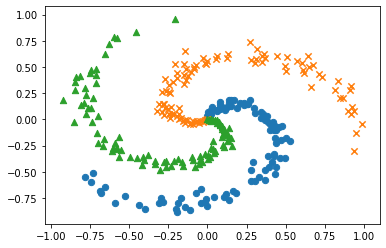

In [19]:
## 스파이럴 데이터셋

import sys
sys.path.append('..')
from dataset import spiral
import matplotlib.pyplot as plt

x, t = spiral.load_data()
print('x', x.shape)
print('t', t.shape)

N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

In [20]:
# coding: utf-8
import sys
sys.path.append('..')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.layers import Affine, Sigmoid, SoftmaxWithLoss


class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size

        # 가중치와 편향 초기화
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)

        # 계층 생성
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        self.loss_layer = SoftmaxWithLoss()

        # 모든 가중치와 기울기를 리스트에 모은다.
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

    def forward(self, x, t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss

    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

| 에폭 1 |  반복 10 / 10 | 손실 1.13
| 에폭 2 |  반복 10 / 10 | 손실 1.13
| 에폭 3 |  반복 10 / 10 | 손실 1.12
| 에폭 4 |  반복 10 / 10 | 손실 1.12
| 에폭 5 |  반복 10 / 10 | 손실 1.11
| 에폭 6 |  반복 10 / 10 | 손실 1.14
| 에폭 7 |  반복 10 / 10 | 손실 1.16
| 에폭 8 |  반복 10 / 10 | 손실 1.11
| 에폭 9 |  반복 10 / 10 | 손실 1.12
| 에폭 10 |  반복 10 / 10 | 손실 1.13
| 에폭 11 |  반복 10 / 10 | 손실 1.12
| 에폭 12 |  반복 10 / 10 | 손실 1.11
| 에폭 13 |  반복 10 / 10 | 손실 1.09
| 에폭 14 |  반복 10 / 10 | 손실 1.08
| 에폭 15 |  반복 10 / 10 | 손실 1.04
| 에폭 16 |  반복 10 / 10 | 손실 1.03
| 에폭 17 |  반복 10 / 10 | 손실 0.96
| 에폭 18 |  반복 10 / 10 | 손실 0.92
| 에폭 19 |  반복 10 / 10 | 손실 0.92
| 에폭 20 |  반복 10 / 10 | 손실 0.87
| 에폭 21 |  반복 10 / 10 | 손실 0.85
| 에폭 22 |  반복 10 / 10 | 손실 0.82
| 에폭 23 |  반복 10 / 10 | 손실 0.79
| 에폭 24 |  반복 10 / 10 | 손실 0.78
| 에폭 25 |  반복 10 / 10 | 손실 0.82
| 에폭 26 |  반복 10 / 10 | 손실 0.78
| 에폭 27 |  반복 10 / 10 | 손실 0.76
| 에폭 28 |  반복 10 / 10 | 손실 0.76
| 에폭 29 |  반복 10 / 10 | 손실 0.78
| 에폭 30 |  반복 10 / 10 | 손실 0.75
| 에폭 31 |  반복 10 / 10 | 손실 0.78
| 에폭 32 |  반복 10 

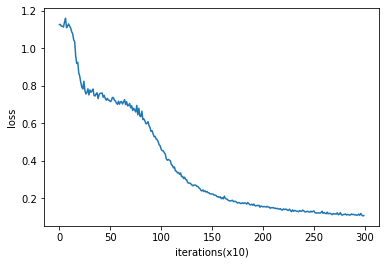

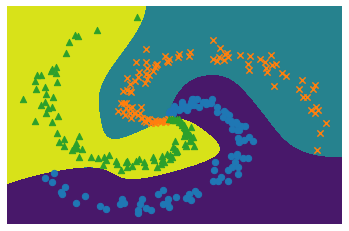

In [23]:
# coding: utf-8
import sys
sys.path.append('..')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.optimizer import SGD
from dataset import spiral
import matplotlib.pyplot as plt
from ch01.two_layer_net import TwoLayerNet


# 하이퍼파라미터 설정
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

# 데이터 읽기, 모델과 옵티마이저 생성
x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

# 학습에 사용하는 변수
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
    # 데이터 뒤섞기
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]

    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]

        # 기울기를 구해 매개변수 갱신
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)

        total_loss += loss
        loss_count += 1

        # 정기적으로 학습 경과 출력
        if (iters+1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print('| 에폭 %d |  반복 %d / %d | 손실 %.2f'
                  % (epoch + 1, iters + 1, max_iters, avg_loss))
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0


# 학습 결과 플롯
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('iterations(x10)')
plt.ylabel('loss')
plt.show()

# 경계 영역 플롯
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

# 데이터점 플롯
x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()


In [30]:
## trainer.py

# coding: utf-8
import sys
sys.path.append('..')
import numpy
import time
import matplotlib.pyplot as plt
from common.np import *  # import numpy as np
from common.util import clip_grads


class Trainer:
    def __init__(self, model, optimizer):
        self.model = model
        self.optimizer = optimizer
        self.loss_list = []
        self.eval_interval = None
        self.current_epoch = 0

    def fit(self, x, t, max_epoch=10, batch_size=32, max_grad=None, eval_interval=20):
        data_size = len(x)
        max_iters = data_size // batch_size
        self.eval_interval = eval_interval
        model, optimizer = self.model, self.optimizer
        total_loss = 0
        loss_count = 0

        start_time = time.time()
        for epoch in range(max_epoch):
            # 뒤섞기
            idx = numpy.random.permutation(numpy.arange(data_size))
            x = x[idx]
            t = t[idx]

            for iters in range(max_iters):
                batch_x = x[iters*batch_size:(iters+1)*batch_size]
                batch_t = t[iters*batch_size:(iters+1)*batch_size]

                # 기울기 구해 매개변수 갱신
                loss = model.forward(batch_x, batch_t)
                model.backward()
                params, grads = remove_duplicate(model.params, model.grads)  # 공유된 가중치를 하나로 모음
                if max_grad is not None:
                    clip_grads(grads, max_grad)
                optimizer.update(params, grads)
                total_loss += loss
                loss_count += 1

                # 평가
                if (eval_interval is not None) and (iters % eval_interval) == 0:
                    avg_loss = total_loss / loss_count
                    elapsed_time = time.time() - start_time
                    print('| 에폭 %d |  반복 %d / %d | 시간 %d[s] | 손실 %.2f'
                          % (self.current_epoch + 1, iters + 1, max_iters, elapsed_time, avg_loss))
                    self.loss_list.append(float(avg_loss))
                    total_loss, loss_count = 0, 0

            self.current_epoch += 1

    def plot(self, ylim=None):
        x = numpy.arange(len(self.loss_list))
        if ylim is not None:
            plt.ylim(*ylim)
        plt.plot(x, self.loss_list, label='train')
        plt.xlabel('iterations (x' + str(self.eval_interval) + ')')
        plt.ylabel('loss')
        plt.show()

| 에폭 1 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 2 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 3 |  반복 1 / 10 | 시간 0[s] | 손실 1.13
| 에폭 4 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 5 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 6 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 7 |  반복 1 / 10 | 시간 0[s] | 손실 1.14
| 에폭 8 |  반복 1 / 10 | 시간 0[s] | 손실 1.16
| 에폭 9 |  반복 1 / 10 | 시간 0[s] | 손실 1.11
| 에폭 10 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 11 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 12 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 13 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 14 |  반복 1 / 10 | 시간 0[s] | 손실 1.09
| 에폭 15 |  반복 1 / 10 | 시간 0[s] | 손실 1.08
| 에폭 16 |  반복 1 / 10 | 시간 0[s] | 손실 1.04
| 에폭 17 |  반복 1 / 10 | 시간 0[s] | 손실 1.03
| 에폭 18 |  반복 1 / 10 | 시간 0[s] | 손실 0.94
| 에폭 19 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 20 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 21 |  반복 1 / 10 | 시간 0[s] | 손실 0.87
| 에폭 22 |  반복 1 / 10 | 시간 0[s] | 손실 0.85
| 에폭 23 |  반복 1 / 10 | 시간 0[s] | 손실 0.80
| 에폭 24 |  반복 1 / 10 | 시간 0[s] | 손실 0.79
| 에폭 25 |  반복 1 / 10 | 시간

| 에폭 218 |  반복 1 / 10 | 시간 0[s] | 손실 0.14
| 에폭 219 |  반복 1 / 10 | 시간 0[s] | 손실 0.15
| 에폭 220 |  반복 1 / 10 | 시간 0[s] | 손실 0.15
| 에폭 221 |  반복 1 / 10 | 시간 0[s] | 손실 0.14
| 에폭 222 |  반복 1 / 10 | 시간 0[s] | 손실 0.13
| 에폭 223 |  반복 1 / 10 | 시간 0[s] | 손실 0.15
| 에폭 224 |  반복 1 / 10 | 시간 0[s] | 손실 0.14
| 에폭 225 |  반복 1 / 10 | 시간 0[s] | 손실 0.16
| 에폭 226 |  반복 1 / 10 | 시간 0[s] | 손실 0.12
| 에폭 227 |  반복 1 / 10 | 시간 0[s] | 손실 0.13
| 에폭 228 |  반복 1 / 10 | 시간 0[s] | 손실 0.15
| 에폭 229 |  반복 1 / 10 | 시간 0[s] | 손실 0.14
| 에폭 230 |  반복 1 / 10 | 시간 0[s] | 손실 0.13
| 에폭 231 |  반복 1 / 10 | 시간 0[s] | 손실 0.14
| 에폭 232 |  반복 1 / 10 | 시간 0[s] | 손실 0.13
| 에폭 233 |  반복 1 / 10 | 시간 0[s] | 손실 0.13
| 에폭 234 |  반복 1 / 10 | 시간 0[s] | 손실 0.14
| 에폭 235 |  반복 1 / 10 | 시간 0[s] | 손실 0.13
| 에폭 236 |  반복 1 / 10 | 시간 0[s] | 손실 0.12
| 에폭 237 |  반복 1 / 10 | 시간 0[s] | 손실 0.13
| 에폭 238 |  반복 1 / 10 | 시간 0[s] | 손실 0.14
| 에폭 239 |  반복 1 / 10 | 시간 0[s] | 손실 0.14
| 에폭 240 |  반복 1 / 10 | 시간 0[s] | 손실 0.13
| 에폭 241 |  반복 1 / 10 | 시간 0[s] | 

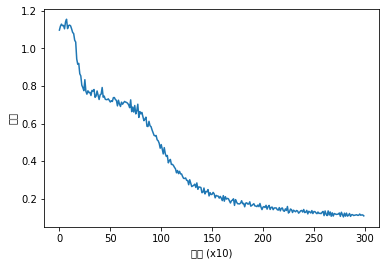

In [31]:
# coding: utf-8
import sys
sys.path.append('..')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.optimizer import SGD
from common.trainer import Trainer
from dataset import spiral
from ch01.two_layer_net import TwoLayerNet


# 하이퍼파라미터 설정
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

trainer = Trainer(model, optimizer)
trainer.fit(x, t, max_epoch, batch_size, eval_interval=10)
trainer.plot()


In [33]:
## 계산 고속화
## 비트 정밀도
## 넘파이의 부동소수점 수는 기본적으로 64비트 데이터 타입을 사용
import numpy as np
a = np.random.randn(3)
a.dtype

dtype('float64')

In [34]:
## 넘파이는 64비트 부동소수점 수를 표준으로 사용합니다. 그러나 신경망의 추론과 학습은 32비트 부동소수점 수로도 충분히
## 수행할 수 있습니다. 32비트는 64비트의 절반이므로 메모리 관점에서는 항상 32비트가 더 좋다고 할 수 있습니다.
## 또 신경망 계산 시 데이터를 전송하는 '버스 대역폭'이 병목이 되는 경우가 있습니다. 이런 경우에도 데이터 타입이 작은 게 유리합니다.
## 마지막으로 계산 속도 측면에서도 32비트 수가 일반적으로 더 빠릅니다. 이런 이유로 이 책에서는 32비트 수를 우선으로 사용합니다.

In [35]:
## 넘파이에서 32비트 부동소수점 수를 사용하려면

b = np.random.randn(3).astype(np.float32)
b.dtype

dtype('float32')

In [36]:
c = np.random.randn(3).astype('f')
c.dtype

dtype('float32')

In [37]:
## 또한 신경망 추론으로 한정하면, 16비트 부동소수점 수를 사용해도 인식률이 거의 떨어지지 않습니다.
## 다만 일반적으로 CPU와 GPU는 연산 자체를 32비트로 수행하므로 처리 속도 면에서는 혜택이 없을 수도 있습니다.
## 그러나 학습된 가중치를 저장할 때는 16비트로 저장하는 것이 32비트 보다 용량을 절반만 사용하므로 유효합니다.